In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('trimmed_data.csv')

In [3]:
df.head()

,Unnamed: 0,stop_date,county_name,county_fips,driver_gender,driver_age_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,contraband_found,stop_outcome,is_arrested,ethnicity
0,0,2013-01-01,San Diego County,6073.0,M,25-32,Hispanic,Mechanical or Nonmoving Violation (VC),Equipment,False,No Search,False,CHP 215,False,H
1,1,2013-01-01,San Diego County,6073.0,F,33-39,Black,Moving Violation (VC),Moving violation,False,No Search,False,CHP 215,False,B
2,2,2013-01-01,San Diego County,6073.0,M,25-32,White,Moving Violation (VC),Moving violation,False,No Search,False,CHP 215,False,W
3,3,2013-01-01,San Diego County,6073.0,M,49+,White,Mechanical or Nonmoving Violation (VC),Equipment,False,No Search,False,CHP 215,False,W
4,4,2013-01-01,San Diego County,6073.0,M,40-48,Black,Mechanical or Nonmoving Violation (VC),Equipment,False,No Search,False,CHP 215,False,B


In [4]:
# Transform stop_date into an actual datetime
df['stop_date'] = pd.to_datetime(df['stop_date'], infer_datetime_format=True)

In [5]:
stops = df.groupby('stop_date')['violation'].count()

In [6]:
stop_dates = stops.index
stop_counts = stops.values
print(stop_dates)
print(stop_counts)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24',
               '2016-06-25', '2016-06-26', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', name='stop_date', length=1277, freq=None)
[ 9896 12345 12803 ...,  9762  9715 10622]


In [7]:
# smooth stops
rolling_week = []
for i, x in enumerate(stop_counts):
    if i < 7:
        rolling_week.append(np.mean(stop_counts[:i]))
    else:
        rolling_week.append(np.mean(stop_counts[i-7:i]))
    

/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


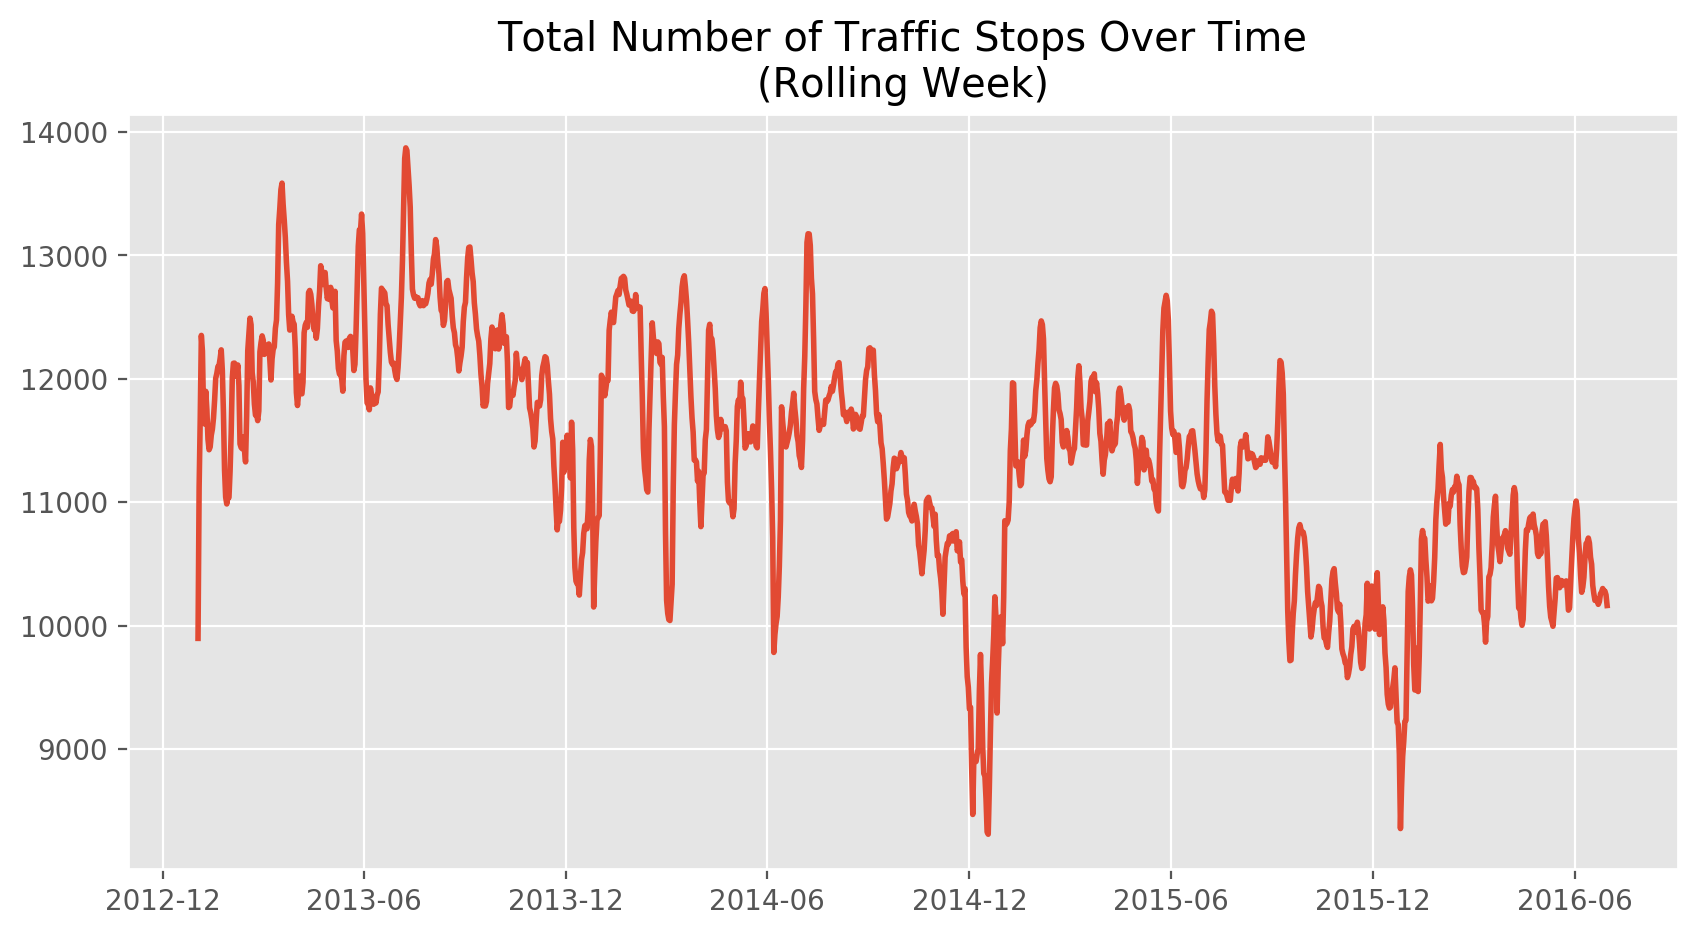

In [8]:
plt.figure(dpi=200, figsize=(10,5))
plt.style.use('ggplot')
plt.plot(stop_dates, rolling_week, lw=2)
plt.title("Total Number of Traffic Stops Over Time\n(Rolling Week)")
plt.show()

In [24]:
# smooth stops
rolling_month = []
for i, x in enumerate(stop_counts):
    if i < 30:
        rolling_month.append(np.mean(stop_counts[:i]))
    else:
        rolling_month.append(np.mean(stop_counts[i-30:i]))

/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


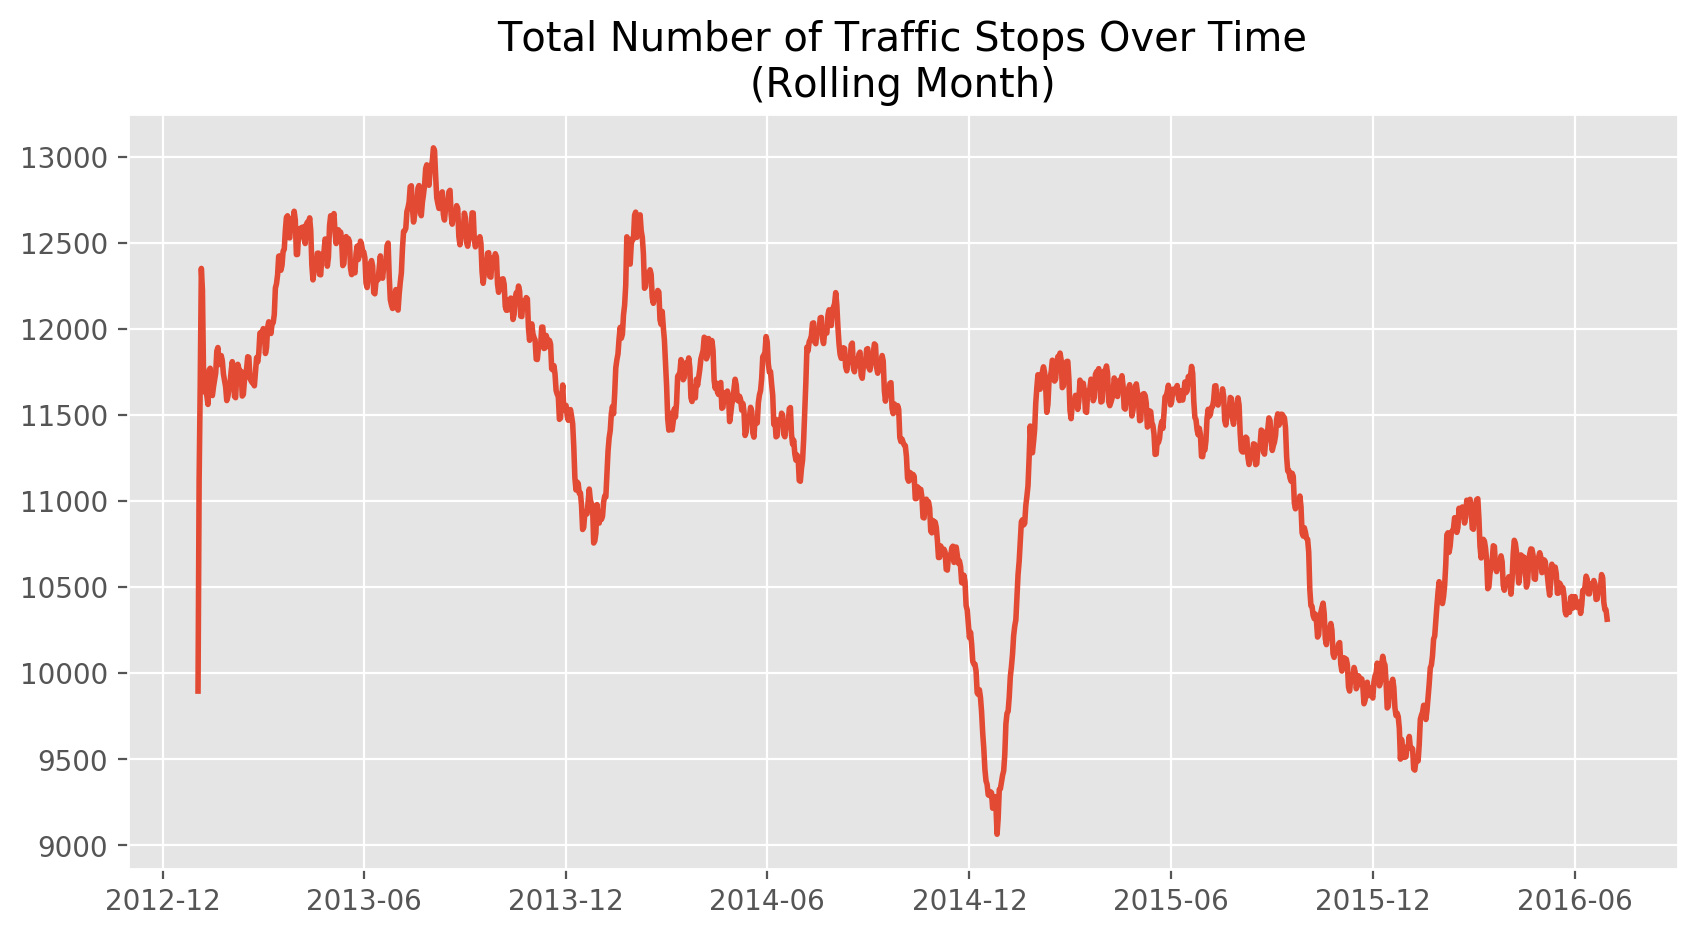

In [72]:
plt.figure(dpi=200, figsize=(10,5))
plt.style.use('ggplot')
plt.plot(stop_dates, rolling_month, lw=2)
plt.title("Total Number of Traffic Stops Over Time\n(Rolling Month)")
plt.show()

In [62]:
# smooth stops
rolling_two_month = []
for i, x in enumerate(stop_counts):
    if i < 60:
        rolling_two_month.append(np.mean(stop_counts[:i]))
    else:
        rolling_two_month.append(np.mean(stop_counts[i-60:i]))

/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


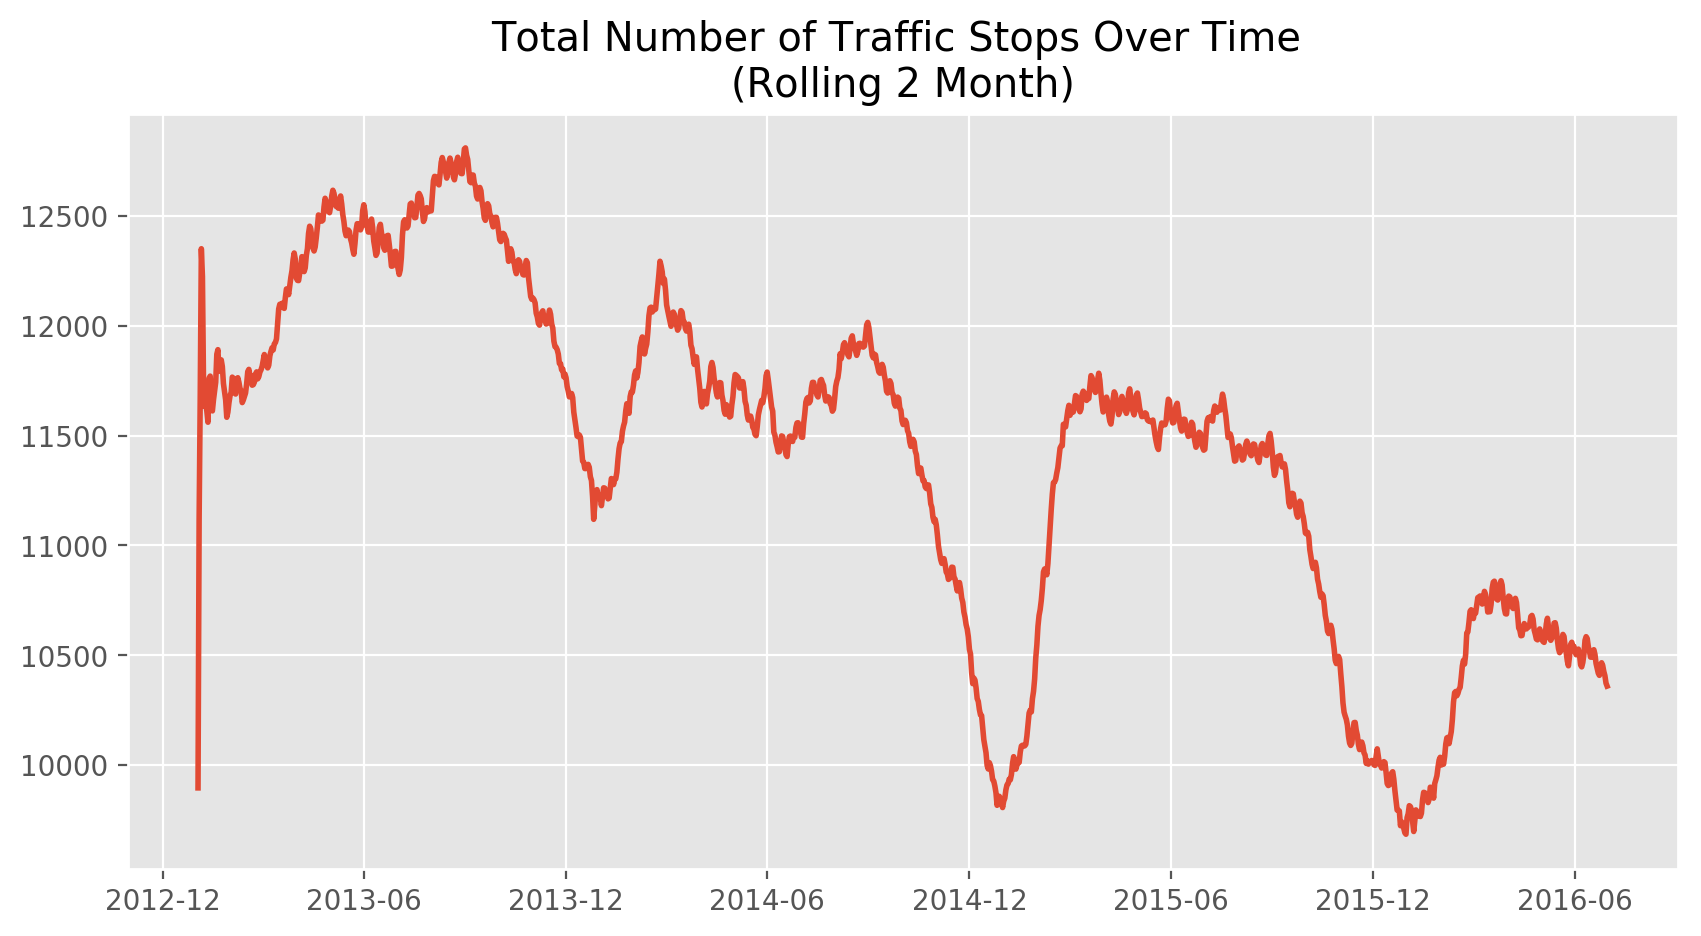

In [73]:
plt.figure(dpi=200, figsize=(10,5))
plt.style.use('ggplot')
plt.plot(stop_dates, rolling_two_month, lw=2)
plt.title("Total Number of Traffic Stops Over Time \n(Rolling 2 Month)")
plt.show()

In [77]:
# smooth stops
rolling_quarter = []
for i, x in enumerate(stop_counts):
    if i < 60:
        rolling_quarter.append(np.mean(stop_counts[:i]))
    else:
        rolling_quarter.append(np.mean(stop_counts[i-90:i]))

/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


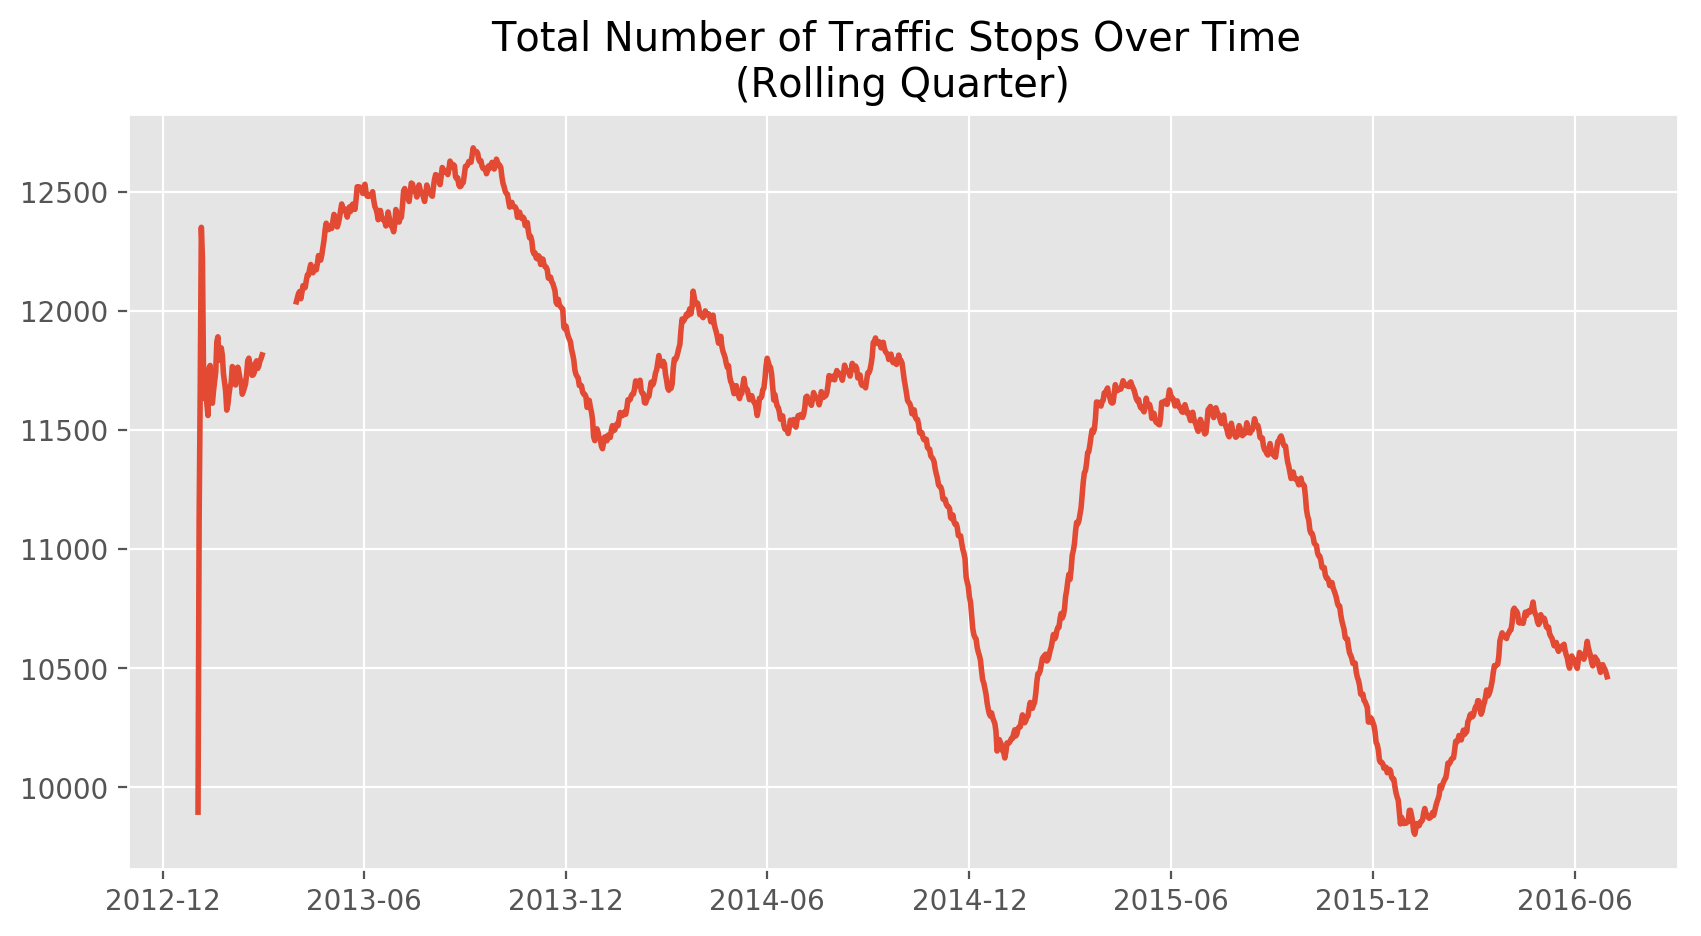

In [78]:
plt.figure(dpi=200, figsize=(10,5))
plt.style.use('ggplot')
plt.plot(stop_dates, rolling_quarter, lw=2)
plt.title("Total Number of Traffic Stops Over Time \n(Rolling Quarter)")
plt.show()

In [38]:
df['search_conducted'].value_counts()[True]

478727

In [42]:
races = df['driver_race'].unique()
stops_by_race = {}
searched_by_race = {}
contraband_by_race = {}
arrested_by_race = {}

for race in races:
    print("Analyzing {}".format(race))
    race_df = df[df['driver_race'] == race][['search_conducted', 'contraband_found', 'is_arrested']]
    stops_by_race[race] = len(race_df)
    searched_by_race[race] = race_df['search_conducted'].value_counts()[True]
    contraband_by_race[race] = race_df['contraband_found'].value_counts()[True]
    arrested_by_race[race] = race_df['is_arrested'].value_counts()[True]
    
# df.groupby('driver_race')['driver_race', 'search_conducted', 'contraband_found', 'is_arrested'].head()

Analyzing Hispanic
Analyzing Black
Analyzing White
Analyzing Other
Analyzing Asian


In [43]:
stops_by_race

{'Asian': 1012306,
 'Black': 1221604,
 'Hispanic': 4954207,
 'Other': 1163969,
 'White': 6184252}

In [44]:
searched_by_race

{'Asian': 19100,
 'Black': 53461,
 'Hispanic': 222618,
 'Other': 21985,
 'White': 161563}

In [47]:
percentage_searched = {}
for race in stops_by_race:
    percentage_searched[race] = searched_by_race[race] / stops_by_race[race]

percentage_searched

{'Asian': 0.018867812696951317,
 'Black': 0.043762954279782974,
 'Hispanic': 0.044935143000686087,
 'Other': 0.018887960074538069,
 'White': 0.026124905647441275}

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Pier Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


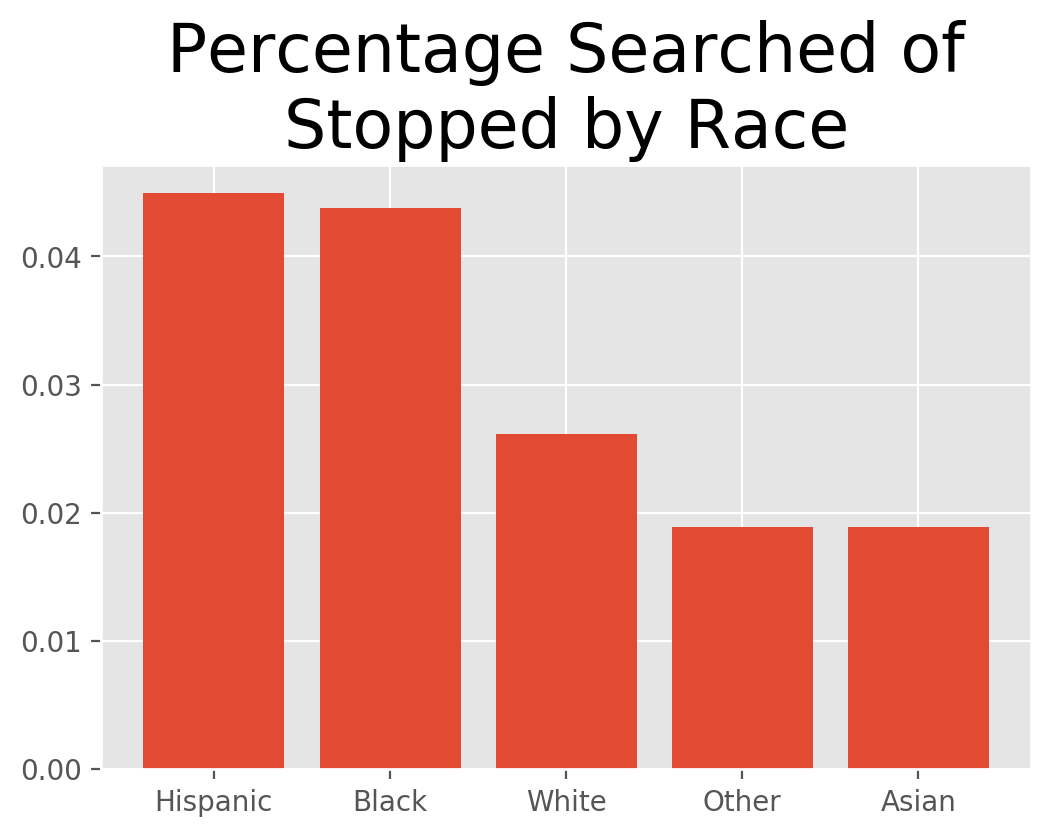

In [57]:
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.bar(range(len(percentage_searched)), [percentage_searched[race] for race in races], align='center')
plt.xticks(range(len(percentage_searched)), races)
plt.title("Percentage Searched of\nStopped by Race", fontsize=24, fontname='Pier Sans')
plt.show()